In [78]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [58]:
aq_data = pd.read_csv('consumed_air_quality.csv')

In [70]:
aq_data.head(5)

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2004-03-10,18:00:00,2.6,150.0,11.881723,166.0,113.0
1,2004-03-10,19:00:00,2.0,112.0,9.397165,103.0,92.0
2,2004-03-10,20:00:00,2.2,88.0,8.997817,131.0,114.0
3,2004-03-10,21:00:00,2.2,80.0,9.228796,172.0,122.0
4,2004-03-10,22:00:00,1.6,51.0,6.518224,131.0,116.0


In [71]:
aq_data['Date'] = pd.to_datetime(aq_data['Date'], format='%Y-%m-%d')
aq_data.dtypes

Date        datetime64[ns]
Time                object
CO(GT)             float64
NMHC(GT)           float64
C6H6(GT)           float64
NOx(GT)            float64
NO2(GT)            float64
dtype: object

In [61]:
pollutants = [
    "CO(GT)", 
    "NMHC(GT)", 
    "C6H6(GT)", 
    "NOx(GT)", 
    "NO2(GT)"
]

pollutants_req = ['CO(GT)',
  'C6H6(GT)',
  'NOx(GT)',
  'NO2(GT)']
aq_data = aq_data[['Date','Time']+pollutants]
aq_data.isnull().mean()*100

Date         0.000000
Time         0.000000
CO(GT)      17.986534
NMHC(GT)    90.231912
C6H6(GT)     3.911510
NOx(GT)     17.516298
NO2(GT)     17.548360
dtype: float64

In [62]:
aq_data.head(5)

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2004-03-10,18:00:00,2.6,150.0,11.881723,166.0,113.0
1,2004-03-10,19:00:00,2.0,112.0,9.397165,103.0,92.0
2,2004-03-10,20:00:00,2.2,88.0,8.997817,131.0,114.0
3,2004-03-10,21:00:00,2.2,80.0,9.228796,172.0,122.0
4,2004-03-10,22:00:00,1.6,51.0,6.518224,131.0,116.0


In [63]:
# Create subplot layout (4 rows, 1 column)
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=('CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)'))

pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)',]

# Add traces
for i, pollutant in enumerate(pollutants, start=1):
    fig.add_trace(go.Scatter(x=aq_data['Date'], y=aq_data[pollutant],
                             mode='lines', name=pollutant),
                  row=i, col=1)

# Layout styling
fig.update_layout(height=900, width=1000,
                  title_text="Time Series of Pollutant Concentrations",
                  showlegend=False)

fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Concentration")

fig.show()


In [65]:
aq_data.dtypes

Date        datetime64[ns]
Time                object
CO(GT)             float64
NMHC(GT)           float64
C6H6(GT)           float64
NOx(GT)            float64
NO2(GT)            float64
dtype: object

In [73]:
# Extract hour of the day and day of the week from 'Time'

aq_data['hour'] = pd.to_datetime(aq_data['Time'], format='%H:%M:%S').dt.hour
aq_data['day_of_week'] = aq_data['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Group by hour of the day and calculate average pollutant concentrations
hourly_avg = aq_data.groupby('hour')[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].mean().reset_index()

# Group by day of the week and calculate average pollutant concentrations
daily_avg = aq_data.groupby('day_of_week')[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].mean().reset_index()

# Hourly average plot with Plotly
fig_hourly = px.line(hourly_avg, x='hour', y=hourly_avg.columns[1:], 
                     title="Hourly Average Pollutant Concentrations", 
                     labels={"hour": "Hour of Day", "value": "Concentration (ppm or other units)"})

fig_hourly.show()

# Daily average plot with Plotly
fig_daily = px.line(daily_avg, x='day_of_week', y=daily_avg.columns[1:], 
                    title="Daily Average Pollutant Concentrations", 
                    labels={"day_of_week": "Day of Week", "value": "Concentration (ppm or other units)"})

# Set x-axis labels as days of the week
fig_daily.update_xaxes(tickmode='array', tickvals=list(range(7)), ticktext=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

fig_daily.show()

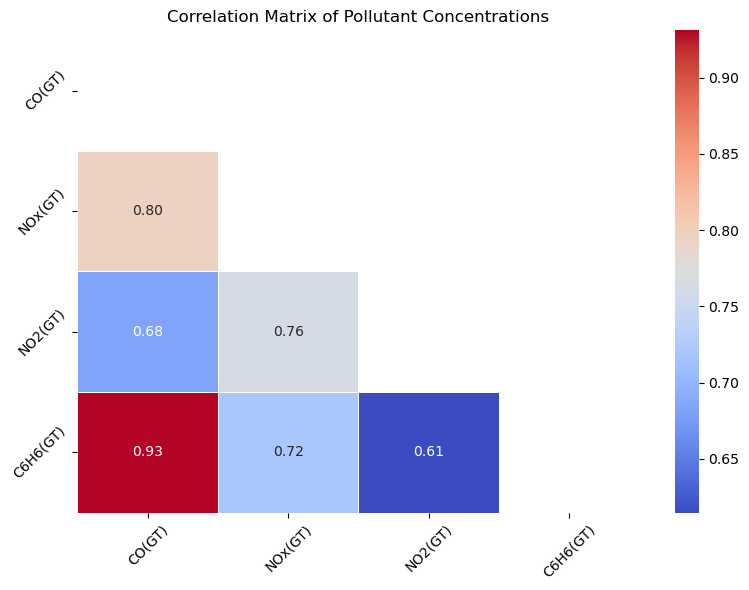

In [84]:
# Calculate the correlation matrix for the pollutants
correlation_matrix = aq_data[pollutants].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap using Seaborn, with the mask applied to the upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            mask=mask, linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix of Pollutant Concentrations')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()